<a href="https://colab.research.google.com/github/nspeer12/AI_CAP4630/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#%tensorflow_version 2.x
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
import math
from tqdm import trange


# Problem 1
Generate random with two separate classes to use for logistic regression


In [2]:
np.random.seed(999)

def get_random_data(w, b, mu, sigma, m):
    
    # labels 1 and 0 with probability of 1/2
    labels = np.array([0 if np.random.rand(1) < .5 else 1 for x in range(m)])
    
    # creating an alternative list
    alt_c = [(-1)**i for i in labels]
    
    # uniform distribution [0, 1)
    x_1 = np.random.uniform(low=0, high=1, size=m)

    noise = np.multiply(alt_c, np.random.normal(loc=mu, scale=sigma, size=m)) 
    
    x_2 = np.multiply(w, x_1)
    x_2 += b
    x_2 = np.add(x_2, noise)
    
    data = np.array([x_1, x_2]).T
    return data, labels

In [3]:
def graph_random_data(data, lables):
    fig, ax = plt.subplots(figsize=(5,5))
    
    # create colors
    colors = ['red' if labels[x] == 1 else 'blue' for x in range(len(labels))]
    
    ax.scatter(data.T[0], data.T[1], c=colors)
    plt.show()


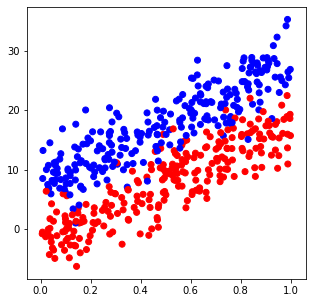

In [4]:
w = 20
b = 3
mu = 5
sigma = 3
m = 500

data, labels = get_random_data(w, b, mu, sigma, m)
graph_random_data(data, labels)

In [5]:
# 80/20 test train split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

# Problem 2


In [6]:
def build_model(input_dim, output_dim, learning_rate=0.01):
    model = keras.Sequential()
    
    # add one layer that outputs with a sigmoid function
    model.add(tf.keras.layers.Dense(output_dim, input_dim=input_dim, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # specify binary cross entropy loss
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer)

    return model

In [7]:
# input dim should be the number of features, which is 2 in our case
input_dim = 2

# output dimension is 1, which represents our classification
output_dim = 1

model = build_model(input_dim, output_dim)

EPOCHS = 200

history = model.fit(x_train, y_train, epochs=EPOCHS)

Train on 400 samples
Epoch 1/200
400/400 [==============================] - 0s 1ms/sample - loss: 4.1943
Epoch 2/200
400/400 [==============================] - 0s 60us/sample - loss: 3.5728
Epoch 3/200
400/400 [==============================] - 0s 68us/sample - loss: 2.9547
Epoch 4/200
400/400 [==============================] - 0s 63us/sample - loss: 2.3634
Epoch 5/200
400/400 [==============================] - 0s 65us/sample - loss: 1.7597
Epoch 6/200
400/400 [==============================] - 0s 68us/sample - loss: 1.2195
Epoch 7/200
400/400 [==============================] - 0s 68us/sample - loss: 0.7500
Epoch 8/200
400/400 [==============================] - 0s 70us/sample - loss: 0.5016
Epoch 9/200
400/400 [==============================] - 0s 63us/sample - loss: 0.4750
Epoch 10/200
400/400 [==============================] - 0s 66us/sample - loss: 0.4718
Epoch 11/200
400/400 [==============================] - 0s 63us/sample - loss: 0.4655
Epoch 12/200
400/400 [=====================

400/400 [==============================] - 0s 65us/sample - loss: 0.2659
Epoch 97/200
400/400 [==============================] - 0s 59us/sample - loss: 0.2620
Epoch 98/200
400/400 [==============================] - 0s 63us/sample - loss: 0.2612
Epoch 99/200
400/400 [==============================] - 0s 63us/sample - loss: 0.2600
Epoch 100/200
400/400 [==============================] - 0s 60us/sample - loss: 0.2587
Epoch 101/200
400/400 [==============================] - 0s 60us/sample - loss: 0.2579
Epoch 102/200
400/400 [==============================] - 0s 63us/sample - loss: 0.2565
Epoch 103/200
400/400 [==============================] - 0s 63us/sample - loss: 0.2556
Epoch 104/200
400/400 [==============================] - 0s 63us/sample - loss: 0.2545
Epoch 105/200
400/400 [==============================] - 0s 65us/sample - loss: 0.2533
Epoch 106/200
400/400 [==============================] - 0s 68us/sample - loss: 0.2527
Epoch 107/200
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 68us/sample - loss: 0.2011
Epoch 191/200
400/400 [==============================] - 0s 63us/sample - loss: 0.2011
Epoch 192/200
400/400 [==============================] - 0s 63us/sample - loss: 0.1996
Epoch 193/200
400/400 [==============================] - 0s 63us/sample - loss: 0.2007
Epoch 194/200
400/400 [==============================] - 0s 60us/sample - loss: 0.1995
Epoch 195/200
400/400 [==============================] - 0s 65us/sample - loss: 0.2004
Epoch 196/200
400/400 [==============================] - 0s 60us/sample - loss: 0.2006
Epoch 197/200
400/400 [==============================] - 0s 63us/sample - loss: 0.1984
Epoch 198/200
400/400 [==============================] - 0s 63us/sample - loss: 0.1978
Epoch 199/200
400/400 [==============================] - 0s 65us/sample - loss: 0.1975
Epoch 200/200
400/400 [==============================] - 0s 63us/sample - loss: 0.1978


In [8]:
# make predictions
preds = model.predict(x_test)

In [9]:
# draw line by obtaining weights

# get weights from model
weights = model.get_weights()

# has input shape of 2, which represent our weight vector
print(weights[0].shape)

# has output shape of 1, which will represent our b
print(weights[1].shape)

(2, 1)
(1,)


## Obtaining Dividing Line



Currently our predictions are in the form
$ \hat y = \sigma ( w_1 x_1 +w_2 x_2 + b )$

To obtain our dividing line, we are trying to get our weights in the form of

$y = mx + b $

So we can isolate $x_2$ to find the line of division

$x_2 = -(w_1 x_1 + b) / w_2 $

In [10]:
# create an array to represent the space of our data
d = np.linspace(0, 1)

predLine = -((weights[0][0] * d) + weights[1]) / weights[0][1]
trueLine = w * d + b

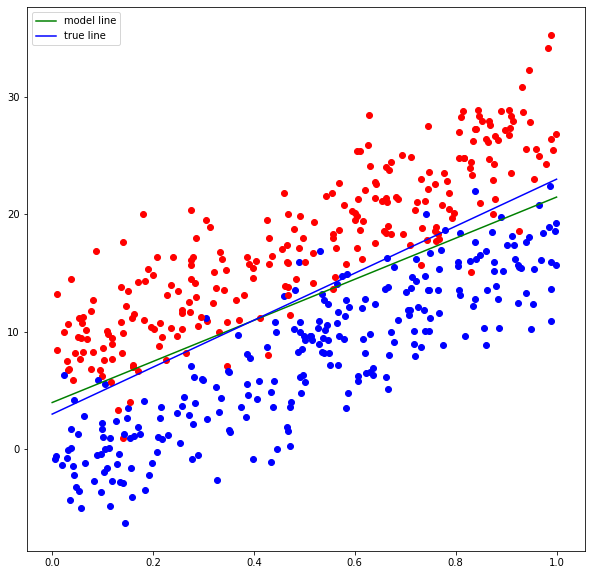

In [11]:
# plot line
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(d, predLine, color='green', label='model line')
ax.plot(d, trueLine, color='blue', label='true line')


for i in range(m):
  # plot real value
  ax.scatter(data.T[0][i], data.T[1][i], c='blue' if labels[i] == 1 else 'red')

ax.legend()
plt.show()

In [12]:
# sigmoid function
def sigmoid(z):
    # silence exp overflow
    try:
        res = 1 / (1 + math.exp(-z))
    except OverflowError:
        # denominator approaches infinity, result approaches 0
        res = 0
        
    return res

class cantMultiply(Exception):
  def __init__(self, matrix1, matrix2):
    print('Cannot multiply ', matrix1, ' and ', matrix2)
    
# compute yhat
def make_prediction(w, b, x):
    return sigmoid(np.dot(w.T, x) + b)
    

In [13]:
# find range of x2
range_min = min(data[1])
range_max = max(data[1])
print(range_min, range_max)

# create a 2D space to make predictions
xv, yv = np.meshgrid(np.linspace(0,1, num=m), np.linspace(range_min, range_max, num=m))
xv = xv[0]
yv = [yv[i][0] for i in range(len(yv))]

d = np.array([xv,yv]).T

map = np.zeros((m,m))

for k in range(len(xv)):
    for j in range(len(yv)):
        map[k][j] = make_prediction(weights[0], weights[1], [xv[k], yv[j]])


0.6641385243585346 16.32152788021787


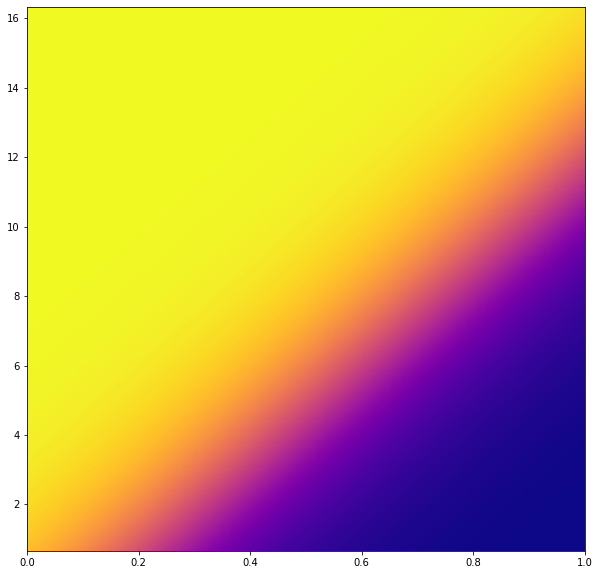

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

cmap = cm.get_cmap('plasma')
ax.pcolormesh(xv, yv, map, shading='gourand', cmap=cmap)

plt.show()

# Problem 3

# Logistic Regression Numpy Implementation

Model


$ \hat y = \sigma ( \Sigma_{j=1}^{n} w_j x_j + b ) = \sigma( \vec w^T \vec x + b) $

# Computing Loss

### Binary Cross Entropy Loss
$ L_{ce} -y \log(a) - (1 - y)\log(1-a)$

### Compute Gradients
$ \frac{\delta L_{ce}}{\delta w_j} = (a - y) \cdot x_j $


$  \frac{\delta L_{ce}}{\delta b} = (a - y)$

In [15]:
# compute gradient of loss function for each weight and b
# return the new weights and b


In [16]:


# Create a class for our numpy model
class Model:
    def __init__(self, input_dim=2, learning_rate=0.1, epochs=1000):
        self.input_dim = input_dim
        
        # weights
        self.weights = np.random.rand(input_dim)
        self.b = np.random.randint(1)
        
        # hyperparameters
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.history = []
    
    def make_prediction(self, x):
        return sigmoid(np.dot(self.weights.T, x) + self.b)
    
    def gradientDescent(self, a, y, x):
        # compute gradient and update each weight
        self.weights[0] -= self.learning_rate * ((a - y) * x[0])
        self.weights[1] -= self.learning_rate * ((a - y) * x[1])
        self.b -= self.learning_rate * (a - y)
    
    def train(self, train_x, train_y):
        # cool progress bar
        pbar = trange(self.epochs, leave=True)
        j = len(train_x)
        
        for e in pbar:
            # go through each example
            for k in range(j):
                a = self.make_prediction(train_x[k])
                y = train_y[k]
                
                # update weights
                self.gradientDescent(a, y, train_x[k])
                self.history.append([self.weights[0], self.weights[1], self.b])

    def binary_cross_entropy_loss(self, a, y):
        return (-y * np.log(a)) - ((1-y) * np.log(1-a))
    
    
    def compute_testing_loss(self, x_test, y_test):
        loss = 0
        n = len(x_test)
            
        for i in range(n):
            a = self.make_prediction(x_test[i])
            loss += self.binary_cross_entropy_loss(a, y_test[i])
        
        print('Average binary cross entropy loss during test: ', loss/n)
        
    def plot_line(self, data, labels, w, b):
        fig, ax = plt.subplots(figsize=(10,10))
        d = np.linspace(0, 1)

        pred_line = -((self.weights[0] * d) + self.b) / self.weights[1]
        ax.plot(d, pred_line, color='green', label='Model Dividing Line')
        
        # plot true line
        true_line = d * w + b
        ax.plot(d, true_line, color='blue', label='True Line')
        
        for i in range(len(data)):
          # plot real value
          ax.scatter(data[i][0], data[i][1], c='red' if labels[i] == 1 else 'blue')
        
        ax.legend()
        plt.show()

    
    def heat_map(self, data, n):
        # n controls the precision of the heat map
        
        # find range of x2
        range_min = min(data[1])
        range_max = max(data[1])

        # create a 2D space to make predictions
        xv, yv = np.meshgrid(np.linspace(0,1, num=n), np.linspace(range_min, range_max, num=n))
        xv = xv[0]
        yv = [yv[i][0] for i in range(len(yv))]

        d = np.array([xv,yv]).T

        map = np.zeros((n,n))

        for k in range(len(xv)):
            for j in range(len(yv)):
                map[k][j] = self.make_prediction([xv[k], yv[j]])
        
        fig, ax = plt.subplots(figsize=(10,10))
        ax.pcolormesh(xv, yv, map, shading='gourand', cmap='plasma')
        plt.show()

In [ ]:
# create model
# during testing, I was getting better results with slower learning rates
model = Model(learning_rate=0.001, epochs=300)
model.train(data, labels)

 42%|████▏     | 126/300 [00:00<00:01, 134.94it/s]

In [ ]:
model.plot_line(x_train, y_train, w, b)

In [ ]:
# heatmap
model.heat_map(data, 100)

In [ ]:
# test accuracy of the model
model.compute_testing_loss(x_test, y_test)